In [28]:
import importlib
import sys
import subprocess

def instalar(paquete, nombre=None):
  if nombre is None:
    nombre = paquete
  try:
    importlib.import_module(paquete)
    print(f"{nombre} ya esta instalado")
  except ImportError:
    print(f"Instalando {nombre}...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", paquete])

instalar("polars")
instalar("numpy")
instalar("seaborn")
instalar("matplotlib")
instalar("scikit-learn","sklearn")

polars ya esta instalado
numpy ya esta instalado
seaborn ya esta instalado
matplotlib ya esta instalado
Instalando sklearn...


In [29]:
import polars as pl
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os

Importando el dataset

Para importar sin problemas de archivos utilizaremos el codigo otorgado por la pagina


In [30]:
df = pl.read_csv("viviendas.csv", null_values=["?", "&"])
# ESTA LINEA APREVECHA DE POLAR, LEE EL CSV Y TRATARA COMO NULOS LAS COLUMNAS
# MARCADAS CON "&" Y "&" EN EL CSV

# Viendo un poco de la *informacion*

In [31]:
df.head()

folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,num_cuarto,disp_agua,dotac_agua,excusado,uso_compar,sanit_agua,biodigest,bano_comp,bano_excus,bano_regad,drenaje,disp_elect,focos_inca,focos_ahor,combustible,estufa_chi,eli_basura,tenencia,renta,estim_pago,pago_viv,pago_mesp,tipo_adqui,viv_usada,tipo_finan,num_dueno1,hog_dueno1,num_dueno2,hog_dueno2,escrituras,lavadero,fregadero,regadera,tinaco_azo,cisterna,pileta,calent_sol,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,procaptar
i64,i64,i64,i64,i64,str,str,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
100005002,1,8,10,3,"""30""",""" """,1,"""2""",2,4,1,1,1,2,1,2,1,0,0,1,1,0,8,3,""" """,3,4,""" ""","""4000""",""" """,""" ""","""1""","""2""","""1""","""01""","""1""",""" """,""" ""","""1""",2,1,1,1,1,2,1,1,1,1,2,2,2,3,0,3,1,1001,1,4,3,1,206,0
100005003,1,8,10,3,"""15""",""" """,1,"""2""",3,5,1,1,1,2,1,2,3,1,0,1,1,0,9,4,""" """,3,1,"""8500""",""" """,""" ""","""1""",""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,1,1,1,1,1,2,1,1,1,1,1,2,2,2,1,1,1,1001,1,4,3,1,206,0
100005004,1,8,10,3,"""25""",""" """,1,"""2""",3,7,1,1,1,2,1,2,2,1,0,1,1,0,10,3,""" """,3,4,""" ""","""10000""",""" """,""" ""","""1""","""2""","""5""","""01""","""1""",""" """,""" ""","""1""",1,1,1,1,1,1,1,1,1,1,2,2,2,3,2,1,1,1001,1,4,3,1,206,0
100012002,1,8,10,3,"""50""",""" """,1,"""2""",4,6,1,1,1,2,1,2,2,0,0,1,1,9,8,4,""" """,3,4,""" ""","""5000""",""" """,""" ""","""1""","""2""","""1""","""01""","""1""",""" """,""" ""","""1""",1,1,1,1,1,2,1,1,1,1,2,2,2,5,3,2,2,1001,1,3,2,2,167,0
100012004,1,8,10,3,"""45""",""" """,1,"""2""",3,4,1,1,1,2,1,2,2,1,0,1,1,0,17,3,""" """,3,4,""" ""","""3000""",""" """,""" ""","""1""","""2""","""2""","""02""","""1""",""" """,""" ""","""1""",2,1,1,1,1,2,2,1,1,1,2,2,2,4,2,2,1,1001,1,3,2,2,167,0


In [32]:
df.tail()

folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,num_cuarto,disp_agua,dotac_agua,excusado,uso_compar,sanit_agua,biodigest,bano_comp,bano_excus,bano_regad,drenaje,disp_elect,focos_inca,focos_ahor,combustible,estufa_chi,eli_basura,tenencia,renta,estim_pago,pago_viv,pago_mesp,tipo_adqui,viv_usada,tipo_finan,num_dueno1,hog_dueno1,num_dueno2,hog_dueno2,escrituras,lavadero,fregadero,regadera,tinaco_azo,cisterna,pileta,calent_sol,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,procaptar
i64,i64,i64,i64,i64,str,str,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
3260797907,1,8,3,2,"""30""",""" """,1,"""2""",1,3,1,1,1,2,1,2,1,0,0,1,1,0,5,3,""" """,1,1,"""800""",""" """,""" ""","""1""",""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,1,2,1,1,1,2,1,2,1,2,2,2,2,3,2,1,1,32046,4,2,560,10232,123,0
3260797908,1,8,3,2,"""30""",""" """,1,"""2""",2,4,1,1,1,2,1,2,1,0,0,1,1,0,7,3,""" """,1,5,""" ""","""1000""",""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,1,2,1,1,2,2,2,1,1,2,2,2,2,3,1,2,1,32046,4,2,560,10232,123,0
3260797909,1,7,10,2,""" ""","""1""",1,"""2""",1,3,1,1,1,2,1,2,1,0,0,1,1,0,5,3,""" """,1,1,"""800""",""" """,""" ""","""1""",""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,1,1,1,1,2,2,1,2,1,2,2,2,2,4,2,2,1,32046,4,2,560,10232,123,0
3260797910,1,7,10,3,"""40""",""" """,1,"""2""",1,4,1,1,1,2,1,2,2,0,0,1,1,0,28,3,""" """,1,4,""" ""","""3000""",""" """,""" ""","""3""",""" ""","""5""","""02""","""1""",""" """,""" ""","""1""",1,1,1,1,2,2,1,1,1,2,1,2,2,2,1,1,1,32046,4,2,560,10232,123,0
3260797912,1,7,7,3,""" ""","""1""",1,"""2""",1,5,1,1,1,2,1,2,1,0,0,1,1,0,8,3,""" """,1,2,""" ""","""800""",""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,""" """,1,1,1,1,2,2,2,2,1,2,2,1,2,3,1,2,1,32046,4,2,560,10232,123,0


In [33]:
df.schema

Schema([('folioviv', Int64),
        ('tipo_viv', Int64),
        ('mat_pared', Int64),
        ('mat_techos', Int64),
        ('mat_pisos', Int64),
        ('antiguedad', String),
        ('antigua_ne', String),
        ('cocina', Int64),
        ('cocina_dor', String),
        ('cuart_dorm', Int64),
        ('num_cuarto', Int64),
        ('disp_agua', Int64),
        ('dotac_agua', Int64),
        ('excusado', Int64),
        ('uso_compar', Int64),
        ('sanit_agua', Int64),
        ('biodigest', Int64),
        ('bano_comp', Int64),
        ('bano_excus', Int64),
        ('bano_regad', Int64),
        ('drenaje', Int64),
        ('disp_elect', Int64),
        ('focos_inca', Int64),
        ('focos_ahor', Int64),
        ('combustible', Int64),
        ('estufa_chi', String),
        ('eli_basura', Int64),
        ('tenencia', Int64),
        ('renta', String),
        ('estim_pago', String),
        ('pago_viv', String),
        ('pago_mesp', String),
        ('tipo_adqui', Stri

Como se logra observar los datos no estan muy limpios.
Para corregir, eliminaremos valores nullos y sustituiremos por el promedio. Los tipos de datos llegan a ser Strign cuando visualizando los datos podemos encotrar que se tratán de números, para asegurar mostraremos una cuenta de que valores se logran a hayar dentro de esas columnas. En caso de que san valores string encriptaremos para no tener inconvenientes

Buscando valores nullos o 'incorrectos'

In [34]:
df.select([
    pl.col(col).is_null().sum().alias(col)
    for col in df.columns
])

folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,num_cuarto,disp_agua,dotac_agua,excusado,uso_compar,sanit_agua,biodigest,bano_comp,bano_excus,bano_regad,drenaje,disp_elect,focos_inca,focos_ahor,combustible,estufa_chi,eli_basura,tenencia,renta,estim_pago,pago_viv,pago_mesp,tipo_adqui,viv_usada,tipo_finan,num_dueno1,hog_dueno1,num_dueno2,hog_dueno2,escrituras,lavadero,fregadero,regadera,tinaco_azo,cisterna,pileta,calent_sol,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,procaptar
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,107,0,0,1,0,0,0,0,0,0,0,6848,0,1729,1729,1729,1729,1729,1729,0,0,471,471,4,0,0,0,0,0,0,0,0,0,442,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
conteo_valores_unicos = {
    col: df.select(pl.col(col).n_unique()).item()
    for col in df.columns
}

# Mostrar resultado
for col, num in conteo_valores_unicos.items():
    if num == 2 :
      conteo_clases = df[col].value_counts()
      print(conteo_clases)

shape: (2, 2)
┌────────────┬───────┐
│ antigua_ne ┆ count │
│ ---        ┆ ---   │
│ str        ┆ u32   │
╞════════════╪═══════╡
│            ┆ 75640 │
│ 1          ┆ 13183 │
└────────────┴───────┘
shape: (2, 2)
┌────────┬───────┐
│ cocina ┆ count │
│ ---    ┆ ---   │
│ i64    ┆ u32   │
╞════════╪═══════╡
│ 2      ┆ 5951  │
│ 1      ┆ 82872 │
└────────┴───────┘
shape: (2, 2)
┌──────────┬───────┐
│ excusado ┆ count │
│ ---      ┆ ---   │
│ i64      ┆ u32   │
╞══════════╪═══════╡
│ 2        ┆ 1729  │
│ 1        ┆ 87094 │
└──────────┴───────┘
shape: (2, 2)
┌──────────┬───────┐
│ lavadero ┆ count │
│ ---      ┆ ---   │
│ i64      ┆ u32   │
╞══════════╪═══════╡
│ 1        ┆ 72687 │
│ 2        ┆ 16136 │
└──────────┴───────┘
shape: (2, 2)
┌───────────┬───────┐
│ fregadero ┆ count │
│ ---       ┆ ---   │
│ i64       ┆ u32   │
╞═══════════╪═══════╡
│ 2         ┆ 31939 │
│ 1         ┆ 56884 │
└───────────┴───────┘
shape: (2, 2)
┌──────────┬───────┐
│ regadera ┆ count │
│ ---      ┆ ---   │
│ i64

In [36]:
# Mostrar resultado
for col, num in conteo_valores_unicos.items():
    if num > 2 :
      conteo_clases = df[col].value_counts()
      print(conteo_clases)

shape: (88_823, 2)
┌────────────┬───────┐
│ folioviv   ┆ count │
│ ---        ┆ ---   │
│ i64        ┆ u32   │
╞════════════╪═══════╡
│ 360028002  ┆ 1     │
│ 1800270203 ┆ 1     │
│ 1160719217 ┆ 1     │
│ 260010414  ┆ 1     │
│ 3100651501 ┆ 1     │
│ …          ┆ …     │
│ 1800403506 ┆ 1     │
│ 160165601  ┆ 1     │
│ 1960115801 ┆ 1     │
│ 1102370306 ┆ 1     │
│ 1161035818 ┆ 1     │
└────────────┴───────┘
shape: (6, 2)
┌──────────┬───────┐
│ tipo_viv ┆ count │
│ ---      ┆ ---   │
│ i64      ┆ u32   │
╞══════════╪═══════╡
│ null     ┆ 107   │
│ 3        ┆ 1442  │
│ 1        ┆ 84259 │
│ 4        ┆ 103   │
│ 2        ┆ 2141  │
│ 5        ┆ 771   │
└──────────┴───────┘
shape: (8, 2)
┌───────────┬───────┐
│ mat_pared ┆ count │
│ ---       ┆ ---   │
│ i64       ┆ u32   │
╞═══════════╪═══════╡
│ 1         ┆ 185   │
│ 3         ┆ 526   │
│ 4         ┆ 180   │
│ 5         ┆ 229   │
│ 2         ┆ 136   │
│ 7         ┆ 6320  │
│ 6         ┆ 3387  │
│ 8         ┆ 77860 │
└───────────┴───────┘
sh

Pese a no ser la forma más efectiva, se logra ver la presencia de valores no deseados. asi como el tipo de datos que hay

In [37]:
# Filtando mas los valores carentes
df = pl.read_csv("viviendas.csv", null_values=["?", "&","null", " "])

In [38]:
# Convirtindo los valores str a int. En caso de encontrarse algún marcará error
df = df.with_columns([
    pl.col(col).cast(pl.Int64)
    for col in df.columns
    if df[col].dtype == pl.Utf8
])


In [39]:
# Haciendo cuenta de los valores nullos:
df.schema

Schema([('folioviv', Int64),
        ('tipo_viv', Int64),
        ('mat_pared', Int64),
        ('mat_techos', Int64),
        ('mat_pisos', Int64),
        ('antiguedad', Int64),
        ('antigua_ne', Int64),
        ('cocina', Int64),
        ('cocina_dor', Int64),
        ('cuart_dorm', Int64),
        ('num_cuarto', Int64),
        ('disp_agua', Int64),
        ('dotac_agua', Int64),
        ('excusado', Int64),
        ('uso_compar', Int64),
        ('sanit_agua', Int64),
        ('biodigest', Int64),
        ('bano_comp', Int64),
        ('bano_excus', Int64),
        ('bano_regad', Int64),
        ('drenaje', Int64),
        ('disp_elect', Int64),
        ('focos_inca', Int64),
        ('focos_ahor', Int64),
        ('combustible', Int64),
        ('estufa_chi', Int64),
        ('eli_basura', Int64),
        ('tenencia', Int64),
        ('renta', Int64),
        ('estim_pago', Int64),
        ('pago_viv', Int64),
        ('pago_mesp', Int64),
        ('tipo_adqui', Int64),
    

In [40]:
df.select([
    pl.col(col).is_null().sum().alias(col)
    for col in df.columns
])

folioviv,tipo_viv,mat_pared,mat_techos,mat_pisos,antiguedad,antigua_ne,cocina,cocina_dor,cuart_dorm,num_cuarto,disp_agua,dotac_agua,excusado,uso_compar,sanit_agua,biodigest,bano_comp,bano_excus,bano_regad,drenaje,disp_elect,focos_inca,focos_ahor,combustible,estufa_chi,eli_basura,tenencia,renta,estim_pago,pago_viv,pago_mesp,tipo_adqui,viv_usada,tipo_finan,num_dueno1,hog_dueno1,num_dueno2,hog_dueno2,escrituras,lavadero,fregadero,regadera,tinaco_azo,cisterna,pileta,calent_sol,calent_gas,medidor_luz,bomba_agua,tanque_gas,aire_acond,calefacc,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,procaptar
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,107,0,0,1,13183,75640,0,5951,0,0,0,6848,0,1729,1729,1729,1729,1729,1729,0,0,471,471,4,74893,0,0,77386,11437,81709,70272,24845,71420,29709,24845,24845,85918,85918,24845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
df = df.with_columns([
    pl.col(col).fill_null(pl.col(col).mean())
    for col in df.columns
])

In [42]:
#Sustituyendo por el valor promedio y redondenado al entero más cercano
df = df.select([
    pl.col(col).fill_null(df.select(pl.col(col).mean()).item()).round(0).cast(pl.Int64)
    for col in df.columns
])

In [43]:
# Verificando una vez más la existencia de valores extraños
for col, num in conteo_valores_unicos.items():
    if num > 2 :
      conteo_clases = df[col].value_counts()
      print(conteo_clases)

shape: (88_823, 2)
┌────────────┬───────┐
│ folioviv   ┆ count │
│ ---        ┆ ---   │
│ i64        ┆ u32   │
╞════════════╪═══════╡
│ 801217306  ┆ 1     │
│ 400406302  ┆ 1     │
│ 1104765303 ┆ 1     │
│ 1160572217 ┆ 1     │
│ 205809806  ┆ 1     │
│ …          ┆ …     │
│ 860902403  ┆ 1     │
│ 1407501806 ┆ 1     │
│ 2606653404 ┆ 1     │
│ 2660063823 ┆ 1     │
│ 600748702  ┆ 1     │
└────────────┴───────┘
shape: (5, 2)
┌──────────┬───────┐
│ tipo_viv ┆ count │
│ ---      ┆ ---   │
│ i64      ┆ u32   │
╞══════════╪═══════╡
│ 2        ┆ 2141  │
│ 5        ┆ 771   │
│ 1        ┆ 84366 │
│ 3        ┆ 1442  │
│ 4        ┆ 103   │
└──────────┴───────┘
shape: (8, 2)
┌───────────┬───────┐
│ mat_pared ┆ count │
│ ---       ┆ ---   │
│ i64       ┆ u32   │
╞═══════════╪═══════╡
│ 4         ┆ 180   │
│ 2         ┆ 136   │
│ 7         ┆ 6320  │
│ 5         ┆ 229   │
│ 1         ┆ 185   │
│ 8         ┆ 77860 │
│ 6         ┆ 3387  │
│ 3         ┆ 526   │
└───────────┴───────┘
shape: (10, 2)
┌───────

La unica columna que podria decirnos Si o NO es la ultima (valores 0 y 1)

Por lo que Verificando si hay valores distintos a [0 1] en los resultados (procaptar)

shape: (2, 2)
┌───────────┬───────┐
│ procaptar ┆ count │
│ ---       ┆ ---   │
│ i64       ┆ u32   │
╞═══════════╪═══════╡
│ 0         ┆ 78525 │
│ 1         ┆ 10298 │
└───────────┴───────┘


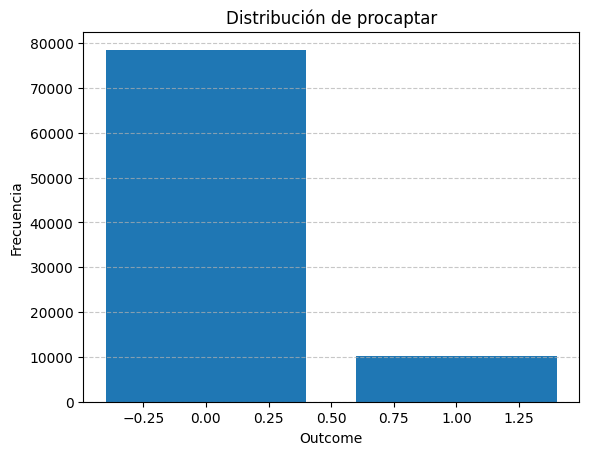

In [44]:

conteo_clases = df['procaptar'].value_counts()
print(conteo_clases)

# Graficando
x = conteo_clases['procaptar'].to_list()
y = conteo_clases['count'].to_list()
plt.bar(x, y)
plt.title('Distribución de procaptar')
plt.xlabel('Outcome')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle ='--', alpha = 0.7)
plt.show()

In [45]:
# Total de registros
total = conteo_clases['count'].sum()

c_0 = conteo_clases.filter(pl.col('procaptar')==0)['count'][0]
c_1 = conteo_clases.filter(pl.col('procaptar')==1)['count'][0]


print(f"Conteo de 0: { c_0 * 100 / total }%")
print(f"Conteo de 1: { c_1 * 100 / total }%")


Conteo de 0: 88.40615606318184%
Conteo de 1: 11.593843936818166%


Por lo que se puede observar hay un alto desbalance. Por ende, se deben de tomar medidas para poder realizar un analisis confiable

# Aplicando Modelo

Se usará random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_np = df.select(pl.exclude('procaptar')).to_numpy()
y_np = df['procaptar'].to_numpy().flatten()

X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42, stratify=y_np)

clf = RandomForestClassifier( class_weight = 'balanced', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     15705
           1       0.97      0.80      0.88      2060

    accuracy                           0.97     17765
   macro avg       0.97      0.90      0.93     17765
weighted avg       0.97      0.97      0.97     17765

[[15647    58]
 [  405  1655]]


# Resultados y Metricas

Matriz de Confusión:
[[15647    58]
 [  405  1655]]


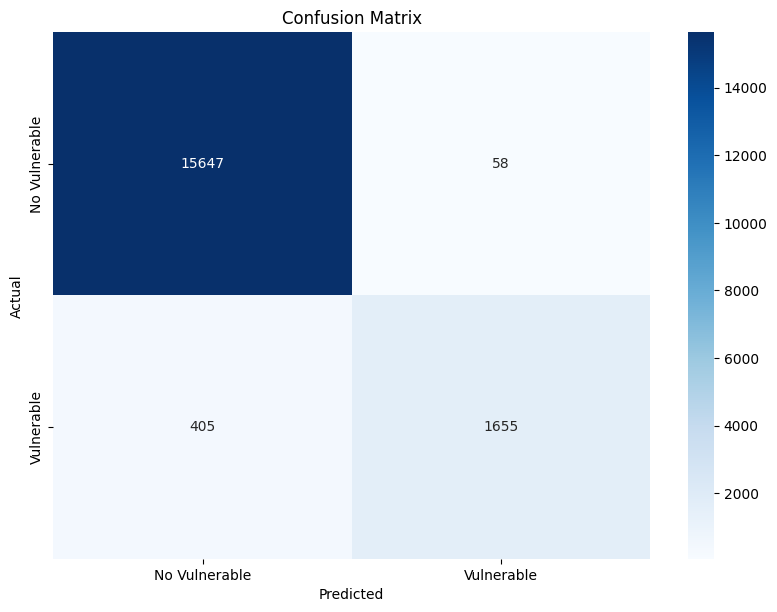

In [49]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Vulnerable', 'Vulnerable'], yticklabels=['No Vulnerable', 'Vulnerable'])
plt.xlabel('Predicted')
plt.tight_layout()
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

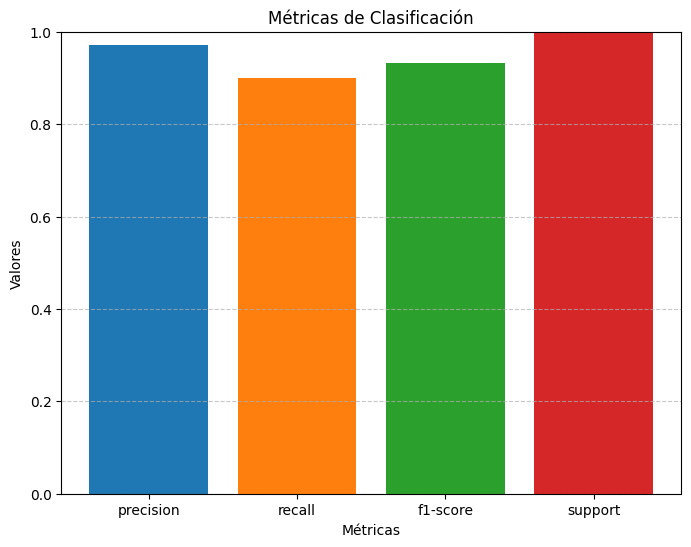

In [50]:
metricas = classification_report(y_test, y_pred, output_dict=True)
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
metricas_macro = metricas['macro avg']
keys = list(metricas_macro.keys())
values = list(metricas_macro.values())

plt.figure(figsize=(8, 6))
plt.ylim(0, 1)
plt.bar(keys, values, color=colores)
plt.title('Métricas de Clasificación')
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.grid(axis='y', linestyle ='--', alpha = 0.7)
plt.show()